# Deep Learning Methods for Medical Image Analysis (CM2003)

# Laboratory Assignment 3: Part 1

Lab Group 8:
- Gnana Spandana Akumalla
- Patrik Svensson
- Serkan Arda Yilal

In [34]:
import os
import numpy as np
import pandas as pd
from random import shuffle
from skimage.io import imread
from skimage.transform import resize
from keras.utils.np_utils import to_categorical   
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Activation, Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

#In case you would like to import the functions from python files containing the functions, import following lines

from Models import lenet_model, alexnet_model, vgg16_model
from DataLoader import gen_labels_multiclass, get_data_multiclass, get_data_arrays, get_train_test_arrays_multiclass


In [57]:
def model_trainer(learning_rate, epochs, n_base, batch_size, x_train, y_train, x_test, y_test,
                  dropout = None, n_class = 2, first2_dense = [64, 64],
                  batch_norm = False, s_dropout = None,
                  loss = "BinaryCrossentropy", optimizer = "Adam",model_type = "alexnet", verbose = 1):
    
#Function for training model and returning classifier history

#------INPUTS------
#learning_rate = value for learning rate
#epoch = number of epochs
#n_base: feature map size
#batch_size = batch size to be used in training
#x_train: training data
#y_train: training labels
#x_test: test data
#y_test: test labels
#dropout = float value to be used in dropout. Default is None so it is inactive. Enter a float value to activate it.
#n_class = number of classes to be predicted. Defines the number of neurons in last dense layer. if 2 classes exist, 1 neuron with sigmoid is used.
#first2_dense = number of neurons to be used in first and second dense layer.
#batch_norm = boolean value for activating batch normalization
#s_droput = float value to be used in spatial dropout. Default is None so it is inactive. Enter a float value to activate it.
#loss = type of loss.
#optimizer = type of optimizer. Can be Adam, SGD, RMSprop
#model_type = parameter for deciding which model should be trained. The options are lenet, alexnet, and rgg16.
#verbose = shows the details of the training. 2 or more will give more details while 1 give no details.

#------OUTPUTS------
#clf_hist = classifier history during training.
    
    if n_class == 2:
        metrics = ["binary_accuracy"]
    elif n_class > 2:
        metrics = ["sparse_categorical_accuracy"]
    
    if model_type == "lenet":  
        clf = lenet_model(img_w, img_h, 1, n_base, n_class = n_class)
    elif model_type == "alexnet":
        clf = alexnet_model(img_w, img_h, 1, n_base, dropout = dropout, n_class = n_class, first2_dense = first2_dense,
                  batch_norm = batch_norm, s_dropout = s_dropout)
    elif model_type == "vgg16":
        clf = vgg16_model(img_w, img_h, 1, n_base, dropout = dropout, first2_dense = first2_dense, n_class = n_class)
        
        
    if optimizer == "Adam":
        
        clf.compile(loss=loss, optimizer = Adam(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))
        
    elif optimizer == "SGD":
        
        clf.compile(loss=loss, optimizer = SGD(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    
    elif optimizer == "RMSprop":
        
        clf.compile(loss=loss, optimizer = RMSprop(learning_rate = learning_rate), metrics=metrics) 
        clf_hist = clf.fit(x_train, y_train, shuffle=True, epochs = epochs, batch_size=batch_size, verbose=verbose, 
                       validation_data=(x_test, y_test))    
    

    return clf_hist



def loss_accuracy_plot(clf_hist, string , n_class = 2):

#Function for plotting the results of loss and accuracy

#------INPUTS------
#clf_hist = classifier history during training.
#string = title for the plot.
#n_class = number of class in the classification task. Based on the value, the accuracy type changes.


    if n_class == 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["binary_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_binary_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_binary_accuracy"]),
                    np.max(clf_hist.history["val_binary_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
    elif n_class > 2:
        fig, axs = plt.subplots(1, 2, figsize=(10, 5))

        #Plot for loss values
        axs[0].set_title("Learning curve")
        axs[0].plot(clf_hist.history["loss"], label="loss")
        axs[0].plot(clf_hist.history["val_loss"], label="val_loss")
        axs[0].plot( np.argmin(clf_hist.history["val_loss"]),
                    np.min(clf_hist.history["val_loss"]),
                    marker="x", color="r", label="best model")

        axs[0].set_xlabel("Epochs")
        axs[0].set_ylabel("Loss Value")
        axs[0].legend()

        fig.suptitle(string, fontsize=13)

        #Plot for accuracy values
        axs[1].set_title("Learning curve")
        axs[1].plot(clf_hist.history["sparse_categorical_accuracy"], label="accuracy")
        axs[1].plot(clf_hist.history["val_sparse_categorical_accuracy"], label="val_accuracy")
        axs[1].plot( np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
                    np.max(clf_hist.history["val_sparse_categorical_accuracy"]),
                    marker="x", color="r", label="best model")

        axs[1].set_xlabel("Epochs")
        axs[1].set_ylabel("Accuracy")
        axs[1].legend()
        plt.show()
    
  

In [3]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path = 'Data/DL_course/Lab1/Skin/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path, 'train')
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

x_train, x_test, y_train, y_test = get_train_test_arrays_multiclass(
    train_data_path, test_data_path,
    train_list, test_list, img_h, img_w)

#When using hinge instead of BinaryCrossEntropy as loss function 
#y_test[y_test == 0] = -1
#y_train[y_train == 0] = -1

Reading: 0/1000 of train images
Reading: 100/1000 of train images
Reading: 200/1000 of train images
Reading: 300/1000 of train images
Reading: 400/1000 of train images
Reading: 500/1000 of train images
Reading: 600/1000 of train images
Reading: 700/1000 of train images
Reading: 800/1000 of train images
Reading: 900/1000 of train images
Reading: 0/200 of train images
Reading: 100/200 of train images


### Task 1A)

VGG16 Architecture is implemented under Models.py file with vgg16_model function.

### Task 1B)

In this task, we will search for an optimal learning rate for created VGG16 neural network with other specified settings such as:
- n_epoch = 100
- batch_size = 8
- n_base = 8
- learning_rate = [0.01, 0.001, 0.0001, 0.00005, 0.00001, 0.000001]

In [6]:
learning_rate_list = [0.01, 0.001, 0.0001, 0.00005, 0.00001, 0.000001] # list of learning rates to search
epochs = 100
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [64, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"





Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_91 (Conv2D)          (None, 128, 128, 8)       80        
                                                                 
 activation_112 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_92 (Conv2D)          (None, 128, 128, 8)       584       
                                                                 
 activation_113 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_93 (Conv2D)          (None, 64, 64, 16)        1168      
                                                      

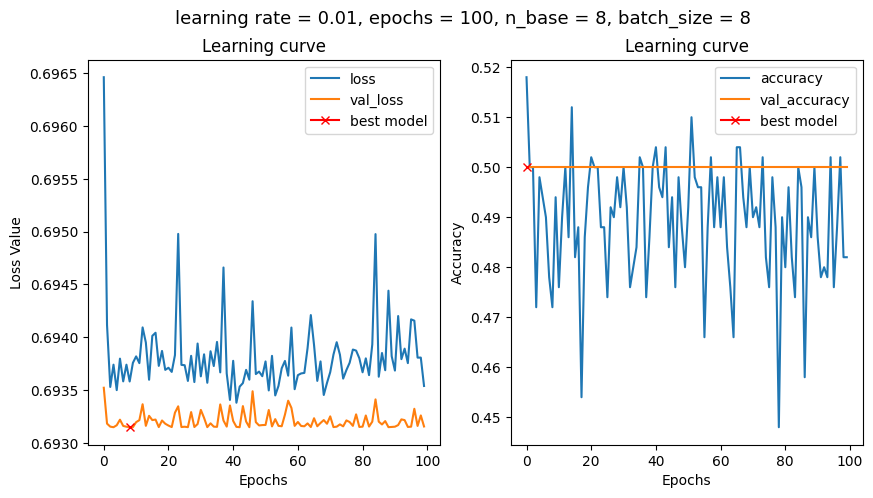

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_104 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_128 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_105 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_129 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_106 (Conv2D)         (None, 64, 64, 16)        1168      
                                                      

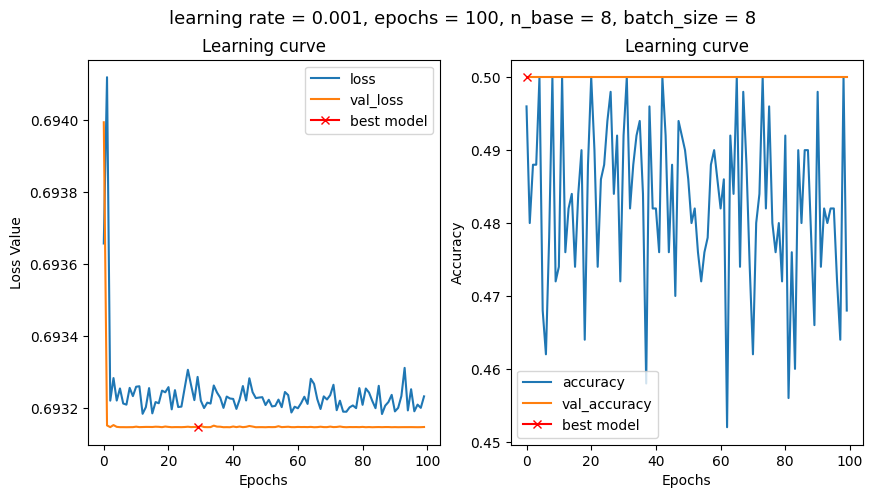

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_117 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_144 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_118 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_145 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_119 (Conv2D)         (None, 64, 64, 16)        1168      
                                                      

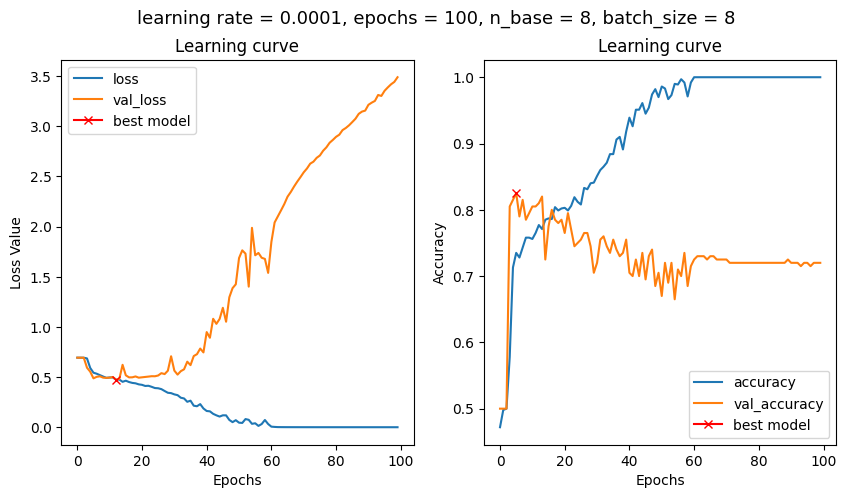

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_130 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_160 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_131 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_161 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_132 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

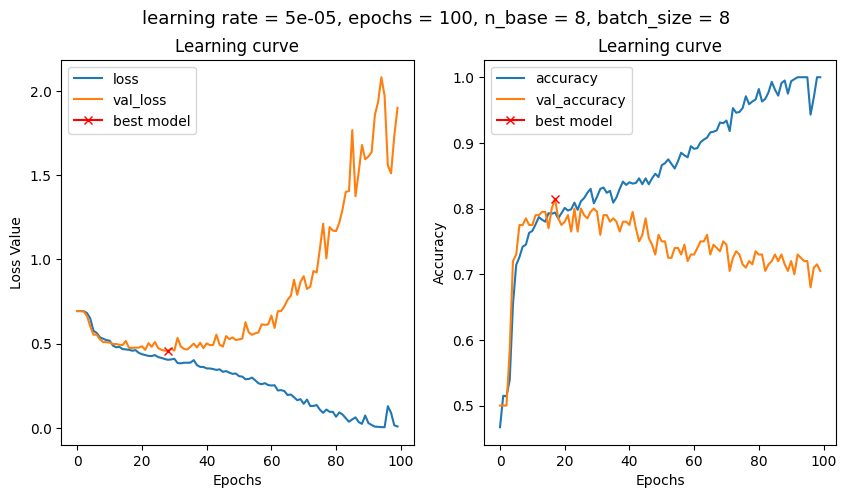

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_143 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_176 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_144 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_177 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_145 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

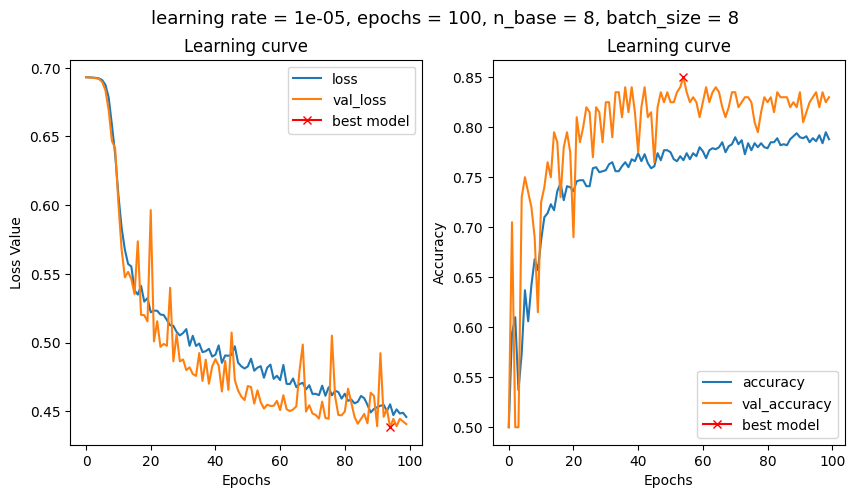

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_156 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_192 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_157 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_193 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_60 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_158 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

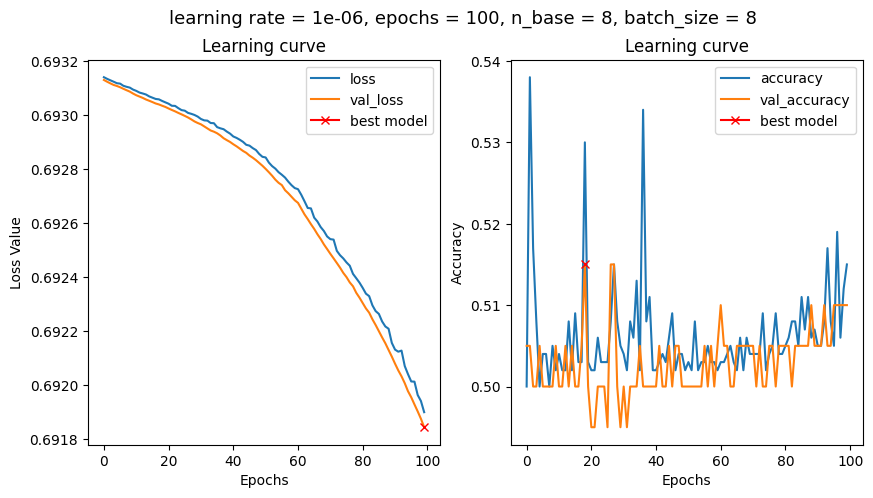

In [10]:
task1b_records = pd.DataFrame(columns = ["learning_rate", "epochs", "batch_size", "n_base", "dropout", "batch_norm",
                                         "spatial_droput", "loss_type", "optimizer","min_train_loss", "min_val_loss",
                                         "max_train_acc", "max_val_acc" ])

for learning_rate in learning_rate_list:
    #training model with specified settings
    clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                             x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, verbose = 0)
    #plotting graph of loss and accuracy for corresponding settings
    loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size))
    #keeping the result values to add to record table
    learning_rate_result = [learning_rate, epochs, batch_size, n_base, dropout, batch_norm, s_dropout, loss, optimizer, 
                           np.min(clf_hist.history["loss"]), np.min(clf_hist.history["val_loss"]),
                           np.max(clf_hist.history["binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"])]
    
    task1b_records.loc[len(task1b_records)] = learning_rate_result

In [12]:
task1b_records[6:]

,learning_rate,epochs,batch_size,n_base,dropout,batch_norm,spatial_droput,loss_type,optimizer,min_train_loss,min_val_loss,max_train_acc,max_val_acc
6,0.010000,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.693379,0.693147,0.518,0.500
7,0.001000,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.693184,0.693147,0.500,0.500
8,0.000100,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.000015,0.473555,1.000,0.825
9,0.000050,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.004265,0.457905,1.000,0.815
10,0.000010,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.445850,0.438364,0.795,0.850
11,0.000001,100,8,8,None,False,None,BinaryCrossentropy,Adam,0.691900,0.691844,0.538,0.515


From the table results shown above, we can see that learning rate = 0.00001 achieved highest validation accuracy (0.850), and lowest validation loss (0.438364) compared to other learning rates. So, we can choose that value as optimal value.

### Task 1C)

For this task, we will compare the VGG 16 with Alexnet based on the settings chosen in previous lab. In Lab 2 Task 6C, the used settings for Alexnet were:

- droput = None
- n_base = 8
- learning_rate = 1e-5
- n_epochs = 150

Let's train the alexnet again with these settings first:

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_169 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_208 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_170 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 activation_209 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 32, 32, 16)       0         
 g2D)                                                

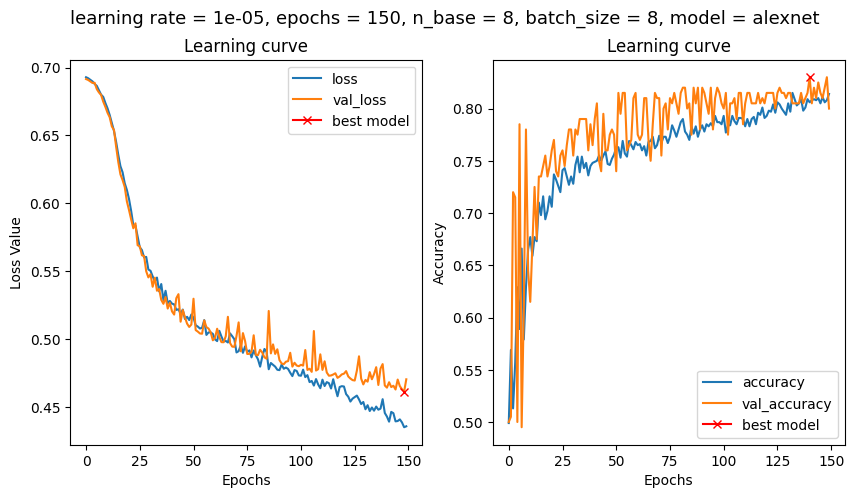

In [13]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [128, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "alexnet"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size, model_type))

Now we can train the vgg16  with the same settings:

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_174 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_216 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_175 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_217 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_176 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

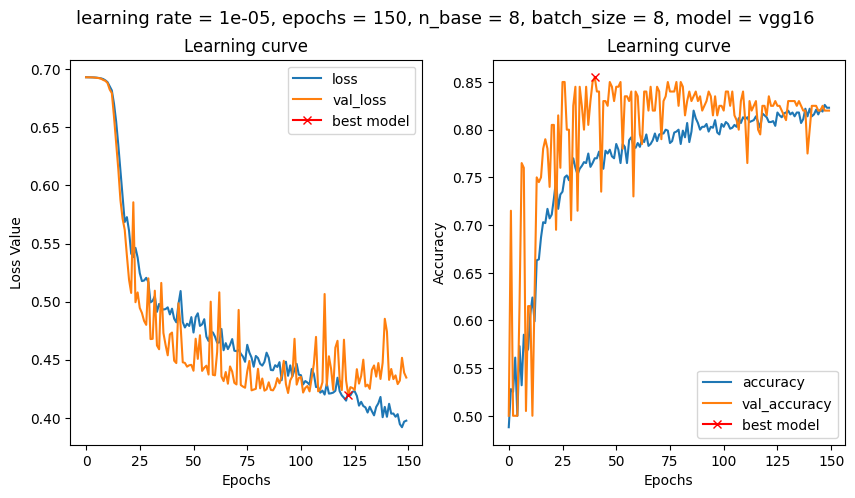

In [14]:
learning_rate = 0.00001
epochs = 150
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [64, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,  model_type))

### Task 1D)

With no dropout:

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_187 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_232 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 conv2d_188 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 activation_233 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_189 (Conv2D)         (None, 64, 64, 32)        4640      
                                                     

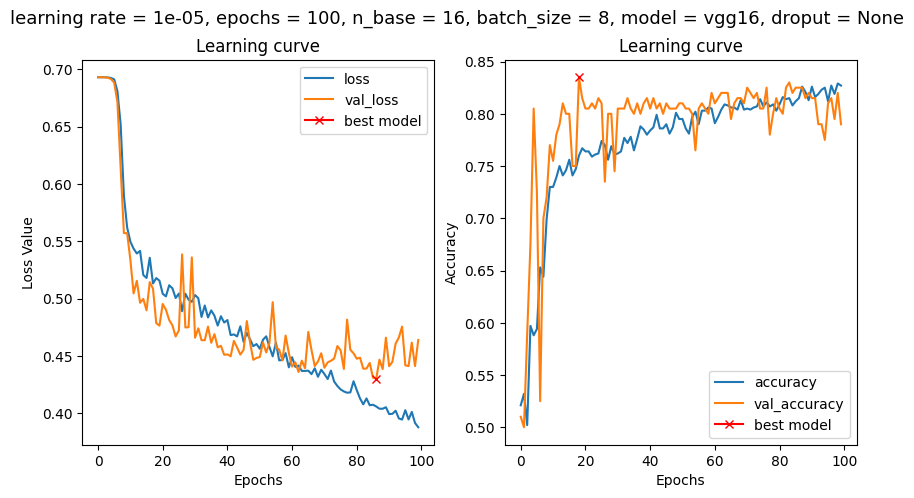

In [15]:
learning_rate = 0.00001
epochs = 100
batch_size = 8
n_base = 16
dropout = None
n_class = 2
first2_dense = [64, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}, droput = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,  
                                                                                                            model_type, dropout))

With dropout = 0.2:

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_200 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_248 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 conv2d_201 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 activation_249 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_202 (Conv2D)         (None, 64, 64, 32)        4640      
                                                     

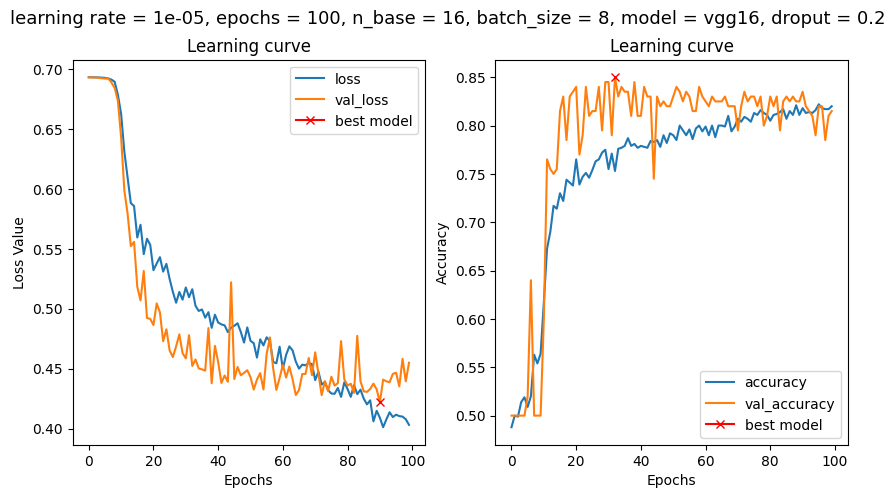

In [16]:
learning_rate = 0.00001
epochs = 100
batch_size = 8
n_base = 16
dropout = 0.2
n_class = 2
first2_dense = [64, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"

#training model with specified settings
clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                         x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, 
                             first2_dense = first2_dense,verbose = 0)

#plotting graph of loss and accuracy for corresponding settings
loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}, droput = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size,  
                                                                                                            model_type, dropout))

### Task 2)

In this task, we will work on Bone dataset. First, we should load the dataset.

In [20]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path_bone = 'Data/DL_course/Lab1/Bone/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path_bone, 'train')
test_data_path = os.path.join(data_path_bone, 'test')
train_list_bone = os.listdir(train_data_path)
test_list_bone = os.listdir(test_data_path)
patterns = ["AFF", "NFF"]

x_train_bone, x_test_bone, y_train_bone, y_test_bone = get_train_test_arrays_multiclass(
    train_data_path, test_data_path,
    train_list_bone, test_list_bone, img_h, img_w, patterns = patterns)

#When using hinge instead of BinaryCrossEntropy as loss function 
#y_test[y_test == 0] = -1
#y_train[y_train == 0] = -1

Reading: 0/1072 of train images
Reading: 100/1072 of train images
Reading: 200/1072 of train images
Reading: 300/1072 of train images
Reading: 400/1072 of train images
Reading: 500/1072 of train images
Reading: 600/1072 of train images
Reading: 700/1072 of train images
Reading: 800/1072 of train images
Reading: 900/1072 of train images
Reading: 1000/1072 of train images
Reading: 0/140 of train images
Reading: 100/140 of train images


Tuning of learning rate for n_base = 8

In [21]:
learning_rate_list = [0.001, 0.0001, 0.00005] # list of learning rates to search
epochs = 100
batch_size = 8
n_base = 8
dropout = None
n_class = 2
first2_dense = [64, 64]
batch_norm = False
s_dropout = None
loss = "BinaryCrossentropy"
optimizer = "Adam"
model_type = "vgg16"



Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_213 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_264 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_214 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_265 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_83 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_215 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

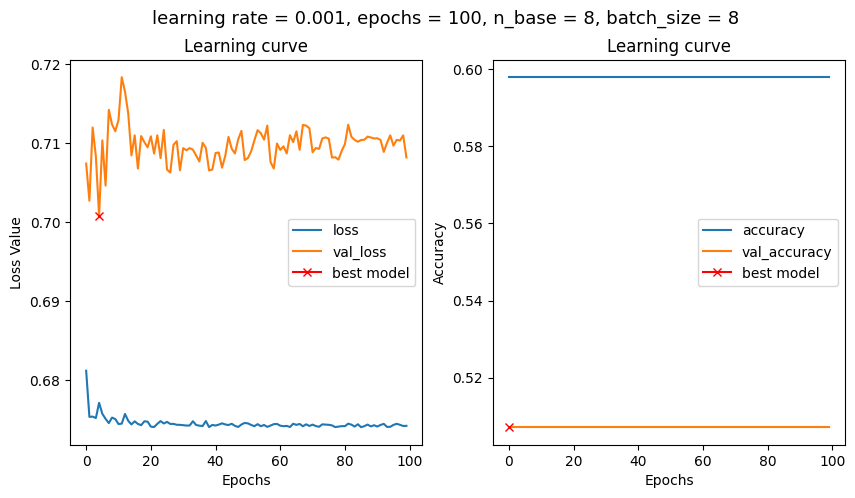

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_226 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_280 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_227 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_281 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_88 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_228 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

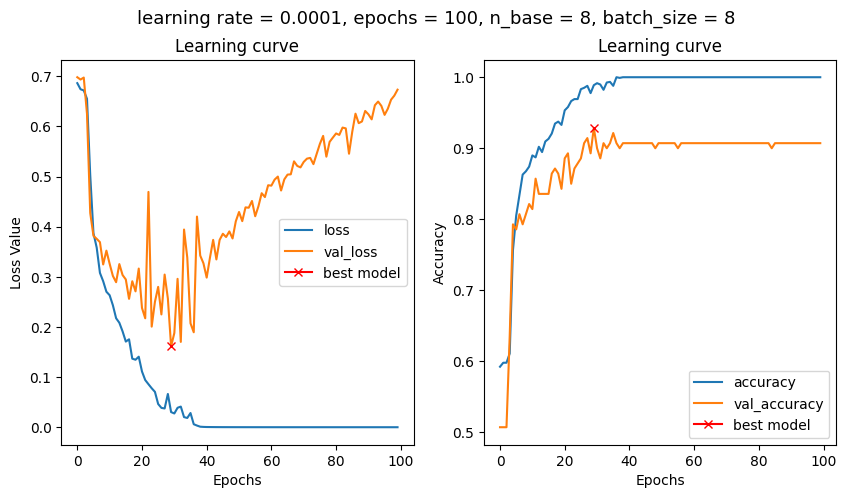

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_239 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_296 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 conv2d_240 (Conv2D)         (None, 128, 128, 8)       584       
                                                                 
 activation_297 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_93 (MaxPoolin  (None, 64, 64, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_241 (Conv2D)         (None, 64, 64, 16)        1168      
                                                     

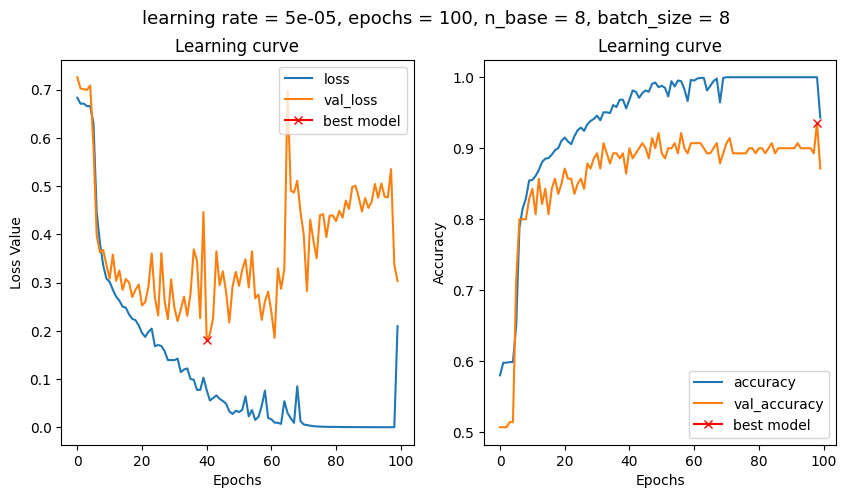

In [22]:
task2_nbase8_records = pd.DataFrame(columns = ["learning_rate", "epochs", "batch_size", "n_base", "dropout", "batch_norm",
                                         "spatial_droput", "loss_type", "optimizer","min_train_loss", "min_val_loss",
                                         "max_train_acc", "max_val_acc" ])

for learning_rate in learning_rate_list:
    #training model with specified settings
    clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                             x_train = x_train_bone, y_train = y_train_bone, x_test = x_test_bone, y_test = y_test_bone,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, verbose = 0)
    #plotting graph of loss and accuracy for corresponding settings
    loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size))
    #keeping the result values to add to record table
    learning_rate_result = [learning_rate, epochs, batch_size, n_base, dropout, batch_norm, s_dropout, loss, optimizer, 
                           np.min(clf_hist.history["loss"]), np.min(clf_hist.history["val_loss"]),
                           np.max(clf_hist.history["binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"])]
    
    task2_nbase8_records.loc[len(task2_nbase8_records)] = learning_rate_result

In [23]:
task2_nbase8_records

,learning_rate,epochs,batch_size,n_base,dropout,batch_norm,spatial_droput,loss_type,optimizer,min_train_loss,min_val_loss,max_train_acc,max_val_acc
0,0.00100,100,8,8,None,False,None,BinaryCrossentropy,Adam,6.740340e-01,0.700785,0.597948,0.507143
1,0.00010,100,8,8,None,False,None,BinaryCrossentropy,Adam,9.883964e-07,0.161114,1.000000,0.928571
2,0.00005,100,8,8,None,False,None,BinaryCrossentropy,Adam,1.213150e-04,0.181004,1.000000,0.935714


Tuning learning rate for n_base = 16

In [24]:
n_base = 16

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_252 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_312 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 conv2d_253 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 activation_313 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_98 (MaxPoolin  (None, 64, 64, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_254 (Conv2D)         (None, 64, 64, 32)        4640      
                                                     

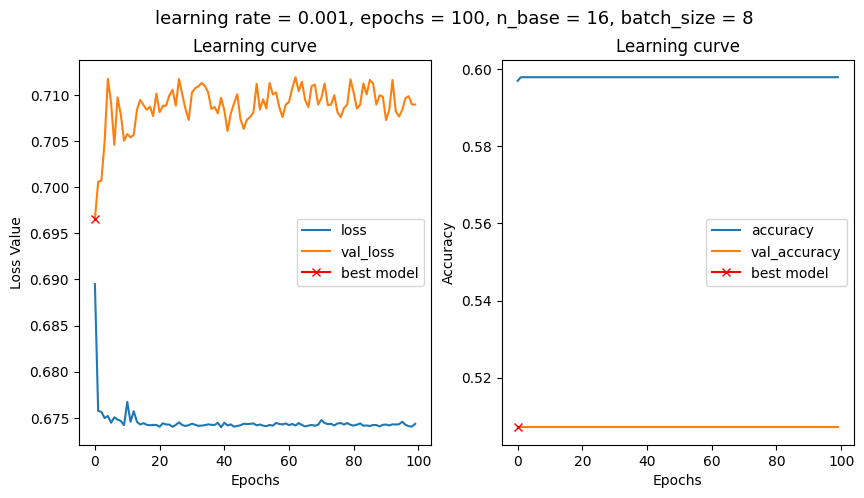

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_265 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_328 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 conv2d_266 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 activation_329 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_103 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_267 (Conv2D)         (None, 64, 64, 32)        4640      
                                                     

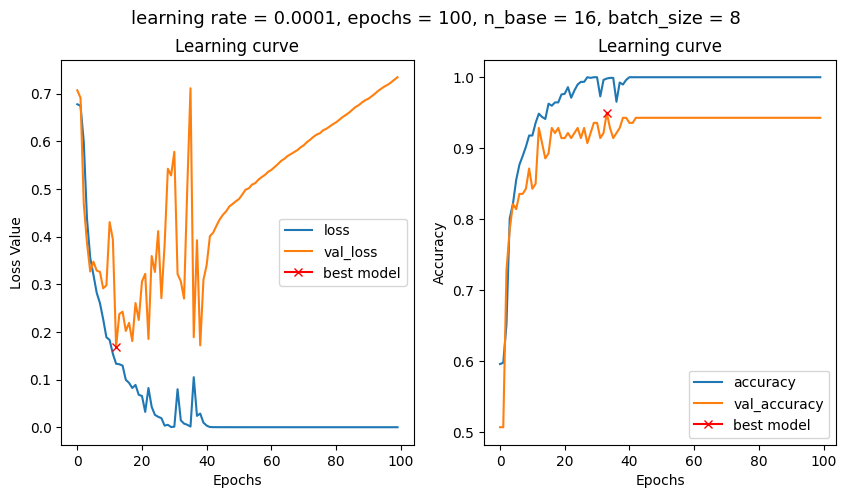

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_278 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_344 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 conv2d_279 (Conv2D)         (None, 128, 128, 16)      2320      
                                                                 
 activation_345 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_108 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_280 (Conv2D)         (None, 64, 64, 32)        4640      
                                                     

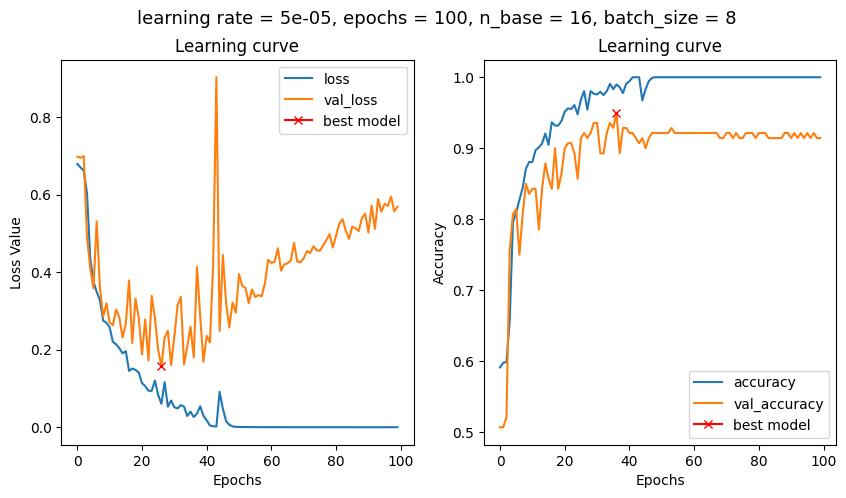

In [25]:
task2_nbase16_records = pd.DataFrame(columns = ["learning_rate", "epochs", "batch_size", "n_base", "dropout", "batch_norm",
                                         "spatial_droput", "loss_type", "optimizer","min_train_loss", "min_val_loss",
                                         "max_train_acc", "max_val_acc" ])

for learning_rate in learning_rate_list:
    #training model with specified settings
    clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                             x_train = x_train_bone, y_train = y_train_bone, x_test = x_test_bone, y_test = y_test_bone,
                             n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                             s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, verbose = 0)
    #plotting graph of loss and accuracy for corresponding settings
    loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}".format(learning_rate,
                                                                                                            epochs,
                                                                                                            n_base,batch_size))
    #keeping the result values to add to record table
    learning_rate_result = [learning_rate, epochs, batch_size, n_base, dropout, batch_norm, s_dropout, loss, optimizer, 
                           np.min(clf_hist.history["loss"]), np.min(clf_hist.history["val_loss"]),
                           np.max(clf_hist.history["binary_accuracy"]), np.max(clf_hist.history["val_binary_accuracy"])]
    
    task2_nbase16_records.loc[len(task2_nbase16_records)] = learning_rate_result

In [26]:
task2_nbase16_records

,learning_rate,epochs,batch_size,n_base,dropout,batch_norm,spatial_droput,loss_type,optimizer,min_train_loss,min_val_loss,max_train_acc,max_val_acc
0,0.00100,100,8,16,None,False,None,BinaryCrossentropy,Adam,6.739770e-01,0.696553,0.597948,0.507143
1,0.00010,100,8,16,None,False,None,BinaryCrossentropy,Adam,2.957690e-07,0.168591,1.000000,0.950000
2,0.00005,100,8,16,None,False,None,BinaryCrossentropy,Adam,3.518253e-06,0.157120,1.000000,0.950000


### Task 4)

In this task, we will use the LeNet and AlexNet models on a multiclass classification task. This task will use the X-ray image dataset with 9 classes. The updated LeNet and AlexNet Architecture are implemented under Models.py file with alexnet_model and lenet_model functions.

For hyperparameter tuning, following values will be checked:
- learning rate = [0.001, 0.0001, 0.00005]
- batch_size = [8]
- n_base = [8, 16]
- epochs = [150]

In [28]:
img_w, img_h = 128, 128 # Setting the width and heights of the images.
data_path_xray = 'Data/DL_course/Lab1/X_ray/' # Path to data root with two subdirs.
train_data_path = os.path.join(data_path_xray, 'train')
test_data_path = os.path.join(data_path_xray, 'test')
train_list_xray = os.listdir(train_data_path)
test_list_xray = os.listdir(test_data_path)
patterns_xray = ["C1", "C2","C3", "C4", "C5", "C6", "C7", "C8", "C9"]
n_class = len(patterns_xray)

x_train_xray, x_test_xray, y_train_xray, y_test_xray = get_train_test_arrays_multiclass(
    train_data_path, test_data_path,
    train_list_xray, test_list_xray, img_h, img_w, patterns = patterns_xray)





Reading: 0/5780 of train images
Reading: 100/5780 of train images
Reading: 200/5780 of train images
Reading: 300/5780 of train images
Reading: 400/5780 of train images
Reading: 500/5780 of train images
Reading: 600/5780 of train images
Reading: 700/5780 of train images
Reading: 800/5780 of train images
Reading: 900/5780 of train images
Reading: 1000/5780 of train images
Reading: 1100/5780 of train images
Reading: 1200/5780 of train images
Reading: 1300/5780 of train images
Reading: 1400/5780 of train images
Reading: 1500/5780 of train images
Reading: 1600/5780 of train images
Reading: 1700/5780 of train images
Reading: 1800/5780 of train images
Reading: 1900/5780 of train images
Reading: 2000/5780 of train images
Reading: 2100/5780 of train images
Reading: 2200/5780 of train images
Reading: 2300/5780 of train images
Reading: 2400/5780 of train images
Reading: 2500/5780 of train images
Reading: 2600/5780 of train images
Reading: 2700/5780 of train images
Reading: 2800/5780 of train imag

#### Tuning lenet model on xray images

In [62]:
learning_rate_list = [0.001, 0.0001, 0.00005] # list of learning rates to search
epochs = 150 
batch_size = 8
n_base_list = [8,16] # list of n_bases to search
dropout = None
n_class = len(patterns_xray)
first2_dense = [64, 64] # not used in lenet
batch_norm = False
s_dropout = None
loss = "sparse_categorical_crossentropy"
optimizer = "Adam"
model_type = "lenet"



Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_309 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_131 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_310 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_132 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                                           
                                                                 
 flatten_32 (Flatten)        (None, 16384)             0         
                                                                 
 dense_87 (Dense)            (None, 16)              

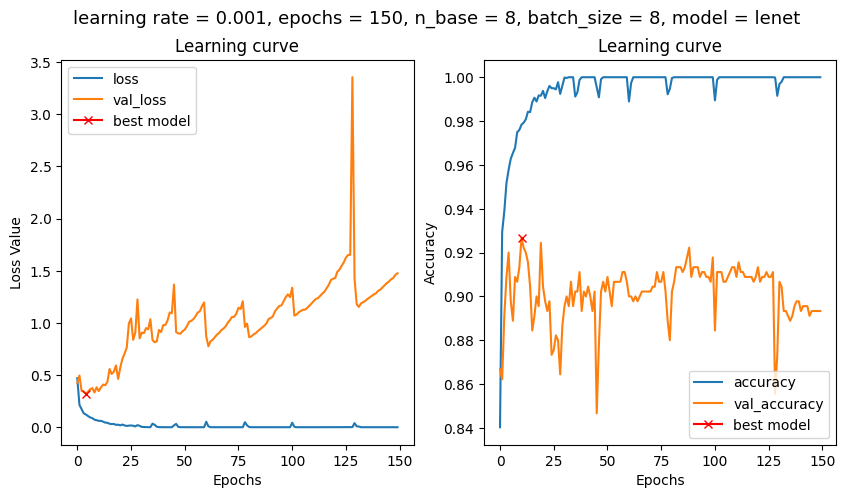

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_311 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_133 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_312 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_134 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_33 (Flatten)        (None, 32768)             0         
                                                                 
 dense_89 (Dense)            (None, 32)              

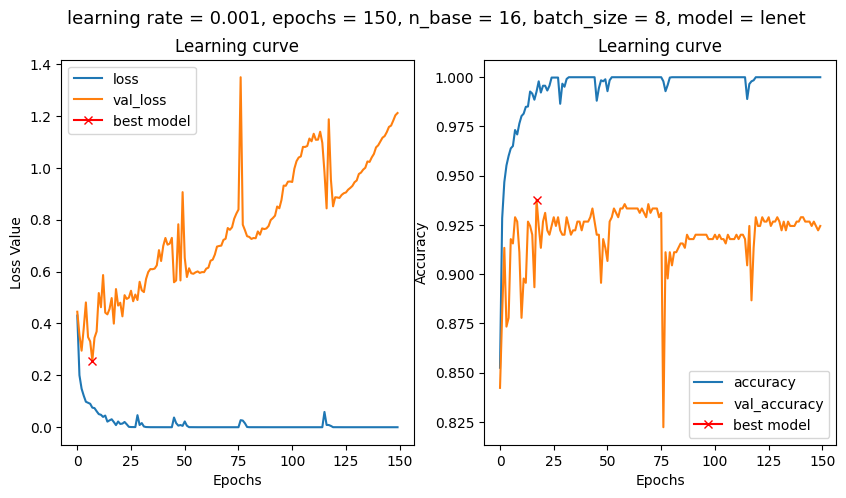

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_313 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_135 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_314 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_136 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                                           
                                                                 
 flatten_34 (Flatten)        (None, 16384)             0         
                                                                 
 dense_91 (Dense)            (None, 16)              

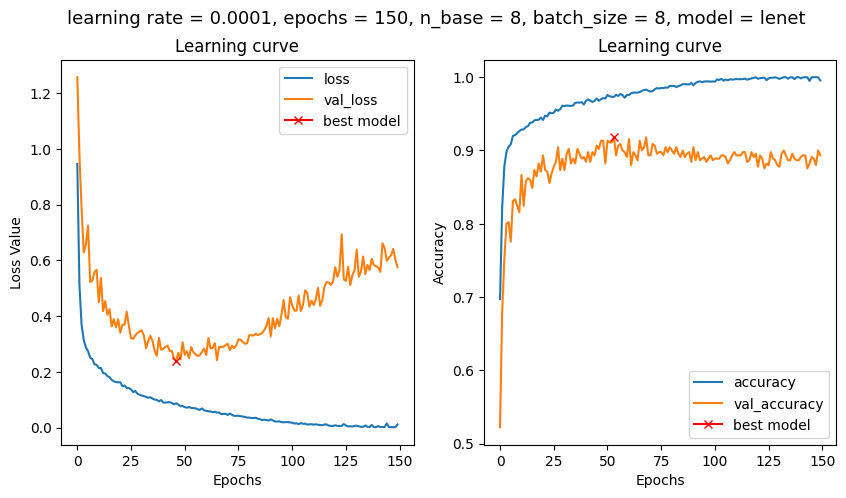

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_315 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_137 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_316 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_138 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_35 (Flatten)        (None, 32768)             0         
                                                                 
 dense_93 (Dense)            (None, 32)              

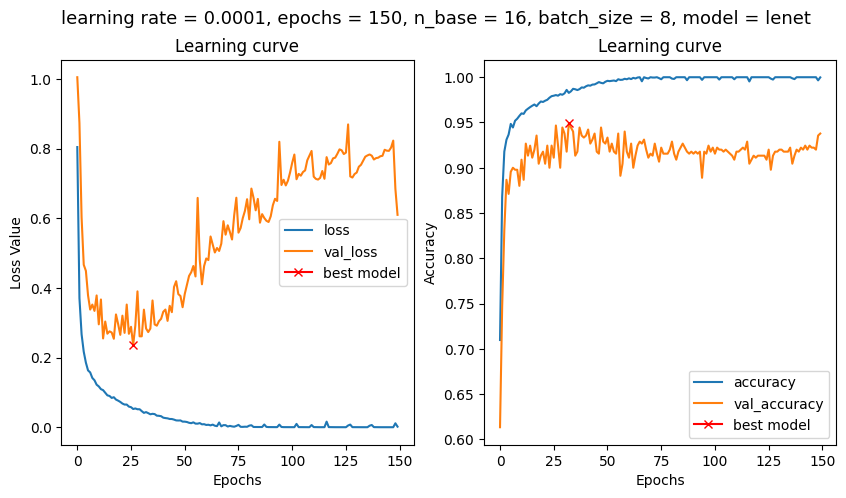

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_317 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 max_pooling2d_139 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_318 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_140 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                                           
                                                                 
 flatten_36 (Flatten)        (None, 16384)             0         
                                                                 
 dense_95 (Dense)            (None, 16)              

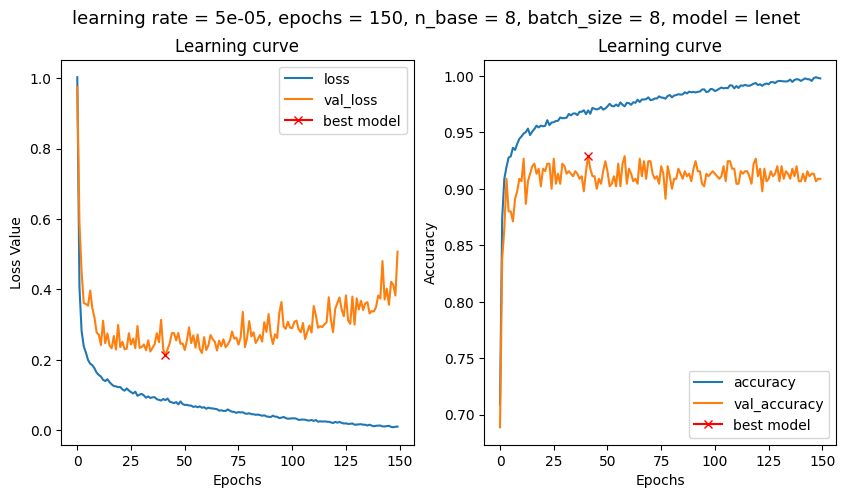

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_319 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 max_pooling2d_141 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_320 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_142 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                                           
                                                                 
 flatten_37 (Flatten)        (None, 32768)             0         
                                                                 
 dense_97 (Dense)            (None, 32)              

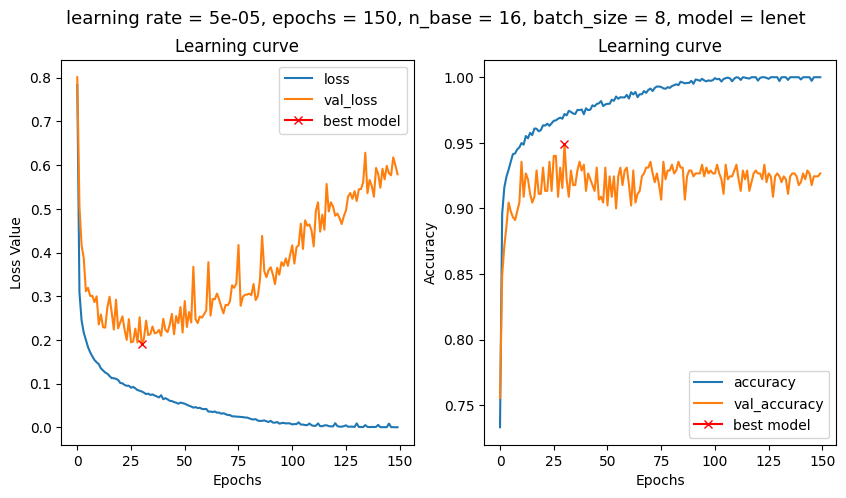

In [63]:
task4_lenet_records = pd.DataFrame(columns = ["learning_rate", "epochs", "batch_size", "n_base", "dropout", "batch_norm",
                                         "spatial_droput", "loss_type", "optimizer",
                                        "min_train_loss_epoch", "min_val_loss_epoch",
                                         "max_train_acc_epoch", "max_val_acc_epoch" ,
                                        "min_train_loss", "min_val_loss",
                                         "max_train_acc", "max_val_acc" ])

for learning_rate in learning_rate_list:
    for n_base in n_base_list:
            
            #training model with specified settings
        clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                                     x_train = x_train_xray, y_train = y_train_xray,
                                     x_test = x_test_xray, y_test = y_test_xray,
                                     n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                                     s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, verbose = 0,
                                     n_class = n_class)
            #plotting graph of loss and accuracy for corresponding settings
        loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}".format(learning_rate,
                                                                                                                    epochs,
                                                                                                                    n_base,batch_size,
                                                                                                                           model_type), 
                                                                                                                   n_class = n_class)
            #keeping the result values to add to record table
        learning_rate_result = [learning_rate, epochs, batch_size, n_base, dropout, batch_norm, s_dropout, loss, optimizer, 
                                   np.argmin(clf_hist.history["loss"]), np.argmin(clf_hist.history["val_loss"]),
                                   np.argmax(clf_hist.history["sparse_categorical_accuracy"]), np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
                                   np.min(clf_hist.history["loss"]), np.min(clf_hist.history["val_loss"]),
                                   np.max(clf_hist.history["sparse_categorical_accuracy"]), np.max(clf_hist.history["val_sparse_categorical_accuracy"])]

        task4_lenet_records.loc[len(task4_lenet_records)] = learning_rate_result

In [64]:
task4_lenet_records

,learning_rate,epochs,batch_size,n_base,dropout,batch_norm,spatial_droput,loss_type,optimizer,min_train_loss_epoch,min_val_loss_epoch,max_train_acc_epoch,max_val_acc_epoch,min_train_loss,min_val_loss,max_train_acc,max_val_acc
0,0.00100,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,127,4,32,10,2.679114e-08,0.321639,1.000000,0.926667
1,0.00100,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,114,7,32,17,9.693488e-10,0.256931,1.000000,0.937778
2,0.00010,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,147,46,132,53,1.145310e-03,0.238100,1.000000,0.917778
3,0.00010,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,147,26,65,32,3.329434e-05,0.236210,1.000000,0.948889
4,0.00005,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,147,41,147,41,8.943638e-03,0.213865,0.998789,0.928889
5,0.00005,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,148,30,110,30,4.258194e-04,0.189775,1.000000,0.948889


#### Tuning Alexnet model on xray images

In [65]:
learning_rate_list = [0.001, 0.0001, 0.00005] # list of learning rates to search
epochs = 150
batch_size = 8
n_base_list = [8,16]  # list of n_bases to search
dropout = None
n_class = len(patterns_xray)
first2_dense = [128, 64] 
batch_norm = False
s_dropout = None
loss = "sparse_categorical_crossentropy"
optimizer = "Adam"
model_type = "alexnet"

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_321 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_375 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_143 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_322 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 activation_376 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_144 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                               

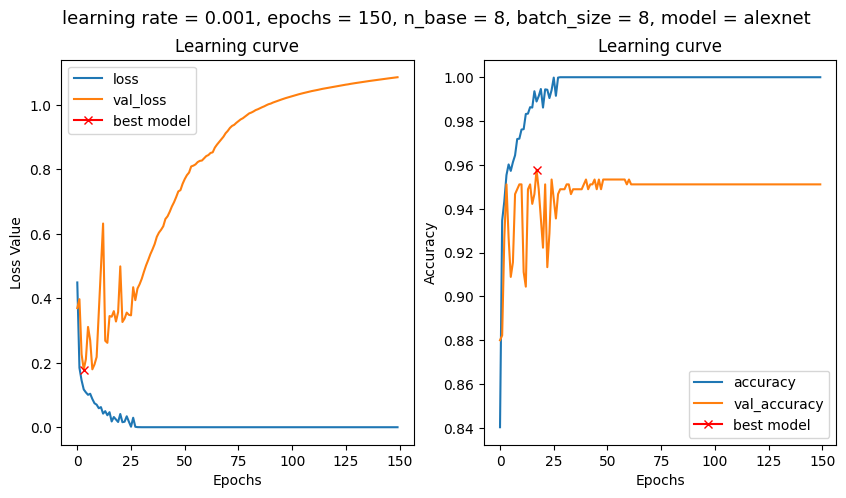

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_326 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_383 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_146 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_327 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 activation_384 (Activation)  (None, 64, 64, 32)       0         
                                                                 
 max_pooling2d_147 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                               

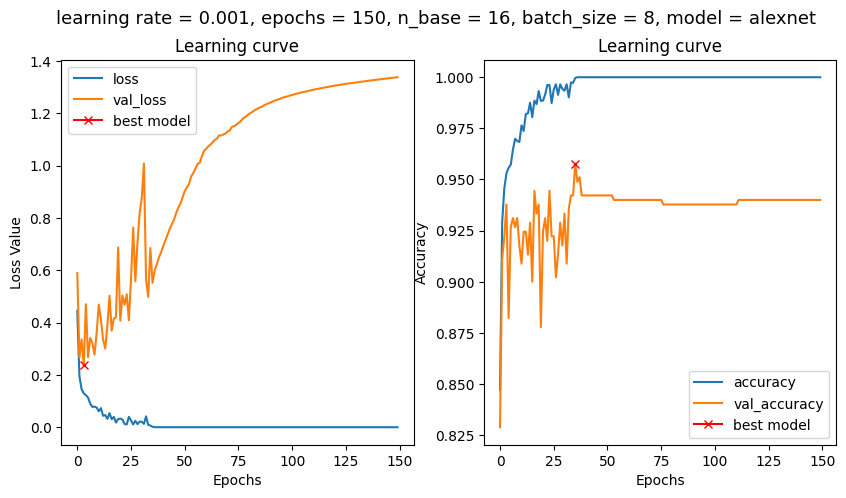

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_331 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_391 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_149 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_332 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 activation_392 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_150 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                               

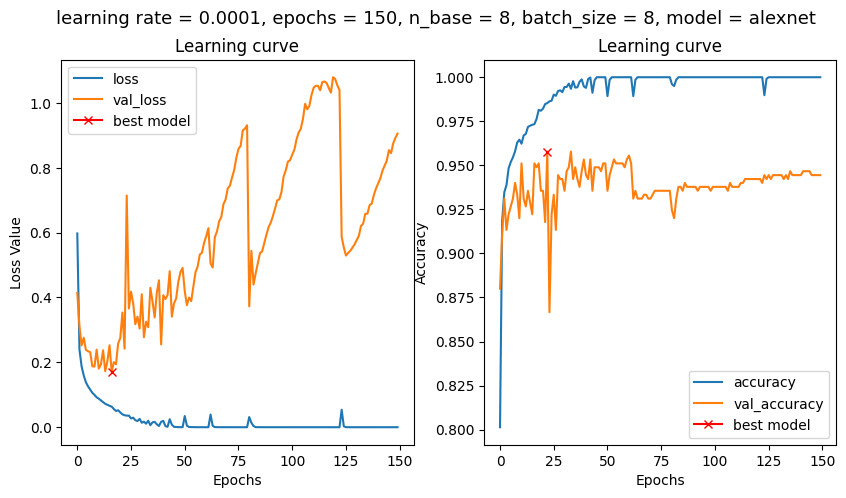

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_336 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_399 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_152 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_337 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 activation_400 (Activation)  (None, 64, 64, 32)       0         
                                                                 
 max_pooling2d_153 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                               

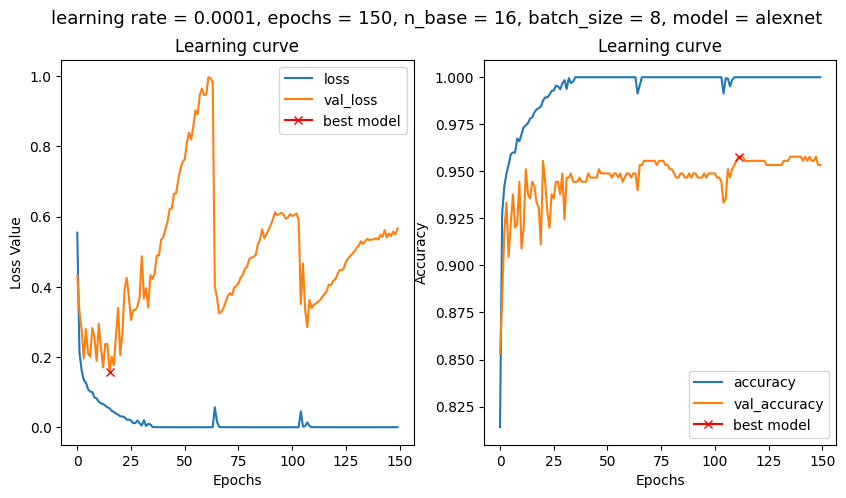

Model: "sequential_42"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_341 (Conv2D)         (None, 128, 128, 8)       80        
                                                                 
 activation_407 (Activation)  (None, 128, 128, 8)      0         
                                                                 
 max_pooling2d_155 (MaxPooli  (None, 64, 64, 8)        0         
 ng2D)                                                           
                                                                 
 conv2d_342 (Conv2D)         (None, 64, 64, 16)        1168      
                                                                 
 activation_408 (Activation)  (None, 64, 64, 16)       0         
                                                                 
 max_pooling2d_156 (MaxPooli  (None, 32, 32, 16)       0         
 ng2D)                                               

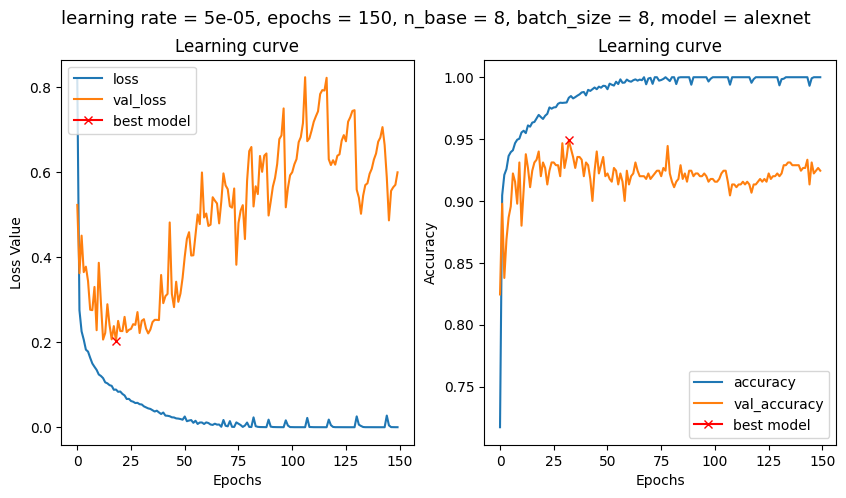

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_346 (Conv2D)         (None, 128, 128, 16)      160       
                                                                 
 activation_415 (Activation)  (None, 128, 128, 16)     0         
                                                                 
 max_pooling2d_158 (MaxPooli  (None, 64, 64, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_347 (Conv2D)         (None, 64, 64, 32)        4640      
                                                                 
 activation_416 (Activation)  (None, 64, 64, 32)       0         
                                                                 
 max_pooling2d_159 (MaxPooli  (None, 32, 32, 32)       0         
 ng2D)                                               

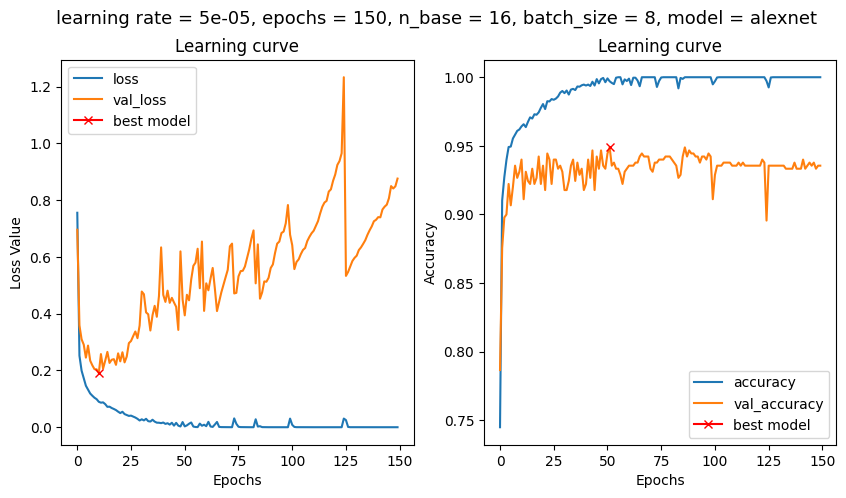

In [66]:
task4_alexnet_records = pd.DataFrame(columns = ["learning_rate", "epochs", "batch_size", "n_base", "dropout", "batch_norm",
                                         "spatial_droput", "loss_type", "optimizer",
                                        "min_train_loss_epoch", "min_val_loss_epoch",
                                         "max_train_acc_epoch", "max_val_acc_epoch" ,
                                        "min_train_loss", "min_val_loss",
                                         "max_train_acc", "max_val_acc" ])

for learning_rate in learning_rate_list:
    for n_base in n_base_list:
            
            #training model with specified settings
        clf_hist = model_trainer(learning_rate = learning_rate, epochs = epochs, 
                                     x_train = x_train_xray, y_train = y_train_xray,
                                     x_test = x_test_xray, y_test = y_test_xray,
                                     n_base = n_base, batch_size = batch_size ,dropout = dropout, batch_norm = batch_norm,
                                     s_dropout = s_dropout, loss = loss, optimizer = optimizer, model_type = model_type, verbose = 0,
                                     n_class = n_class, first2_dense = first2_dense)
            #plotting graph of loss and accuracy for corresponding settings
        loss_accuracy_plot(clf_hist, "learning rate = {}, epochs = {}, n_base = {}, batch_size = {}, model = {}".format(learning_rate,
                                                                                                                    epochs,
                                                                                                                    n_base,batch_size,
                                                                                                                           model_type), 
                                                                                                                   n_class = n_class)
            #keeping the result values to add to record table
        learning_rate_result = [learning_rate, epochs, batch_size, n_base, dropout, batch_norm, s_dropout, loss, optimizer, 
                                   np.argmin(clf_hist.history["loss"]), np.argmin(clf_hist.history["val_loss"]),
                                   np.argmax(clf_hist.history["sparse_categorical_accuracy"]), np.argmax(clf_hist.history["val_sparse_categorical_accuracy"]),
                                   np.min(clf_hist.history["loss"]), np.min(clf_hist.history["val_loss"]),
                                   np.max(clf_hist.history["sparse_categorical_accuracy"]), np.max(clf_hist.history["val_sparse_categorical_accuracy"])]

        task4_alexnet_records.loc[len(task4_alexnet_records)] = learning_rate_result

In [67]:
task4_alexnet_records

,learning_rate,epochs,batch_size,n_base,dropout,batch_norm,spatial_droput,loss_type,optimizer,min_train_loss_epoch,min_val_loss_epoch,max_train_acc_epoch,max_val_acc_epoch,min_train_loss,min_val_loss,max_train_acc,max_val_acc
0,0.00100,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,66,3,28,17,0.000000e+00,0.178816,1.0,0.957778
1,0.00100,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,71,3,36,35,0.000000e+00,0.236017,1.0,0.957778
2,0.00010,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,121,16,45,22,4.537377e-10,0.170527,1.0,0.957778
3,0.00010,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,149,15,35,111,2.062444e-10,0.158003,1.0,0.957778
4,0.00005,150,8,8,None,False,None,sparse_categorical_crossentropy,Adam,129,18,67,32,7.102488e-06,0.203370,1.0,0.948889
5,0.00005,150,8,16,None,False,None,sparse_categorical_crossentropy,Adam,149,10,55,51,5.370599e-08,0.190694,1.0,0.948889
